# Imports

In [1]:
import numpy as np
from scipy import stats
from scipy import ndimage


%matplotlib inline
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns_colors = sns.color_palette(None, 8)
sns_colors2 = sns.color_palette("Blues")
# sns_colors = sns.color_palette("hls", 8)
sns_colors = ['#1075a1','#24b476','#e94d5b','#7D48DA','#faa44f','#1fb0e7','#64E717']

# rc('text', usetex=True)
# plt.rc('font', family='serif')
# import matplotlib as mpl
rc('font', family='serif')
# rc('font', serif='Times')
# rc('font', serif='CMU Serif')

/Users/iassael/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Shared Params

### Load Data

In [2]:
rows = 100
h_10_10 = np.zeros((rows, 4))
data = np.loadtxt('h_10/hats_64_10_10_23.csv', skiprows=1, delimiter=',')
x_axis = data[:rows,0]
h_10_10[:,0] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_108.csv', skiprows=1, delimiter=',')
h_10_10[:,1] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_123.csv', skiprows=1, delimiter=',')
h_10_10[:,2] = data[:rows,5]
# data = np.loadtxt('h_10/hats_64_10_10_842.csv', skiprows=1, delimiter=',')
# h_10_10[:,3] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_950.csv', skiprows=1, delimiter=',')
h_10_10[:,3] = data[:rows,5]

h_10_10 /= 9.5/10

h_10_10_notshared = np.zeros((rows, 6))
data = np.loadtxt('h_10/hats_64_10_10_notshared_123.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,0] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_notshared_135.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,1] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_notshared_201.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,2] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_notshared_243.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,3] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_notshared_453.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,4] = data[:rows,5]
data = np.loadtxt('h_10/hats_64_10_10_notshared_487.csv', skiprows=1, delimiter=',')
h_10_10_notshared[:,5] = data[:rows,5]

h_10_10_notshared /= 9.5/10

h_10_10_q = np.zeros((rows, 3))
data = np.loadtxt('q_table_10/hats_q_table_001.csv', skiprows=1, delimiter=',')
h_10_10_q[:,0] = data[:rows]
data = np.loadtxt('q_table_10/hats_q_table_387.csv', skiprows=1, delimiter=',')
h_10_10_q[:,1] = data[:rows]
data = np.loadtxt('q_table_10/hats_q_table_579.csv', skiprows=1, delimiter=',')
h_10_10_q[:,2] = data[:rows]

h_10_10_q /= 9.5/10


### Plot

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = a.shape[0]
    m, se = a.mean(1), stats.sem(a,1)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m, h

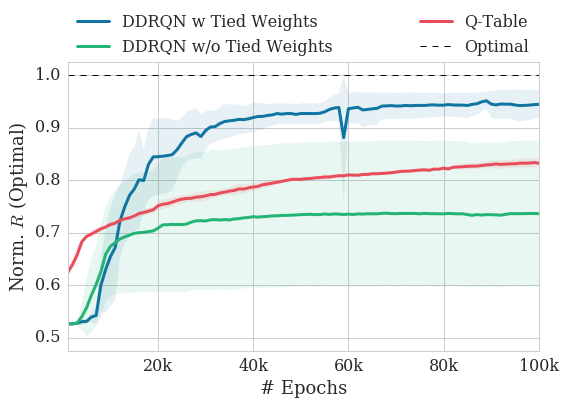

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

h_10_10_m, h_10_10_c = mean_confidence_interval(h_10_10)
plt.plot(x_axis, h_10_10_m, color=sns_colors[0], linestyle='-', linewidth=3, label="DDRQN w Tied Weights")
plt.fill_between(x_axis, h_10_10_m - h_10_10_c, h_10_10_m + h_10_10_c, facecolor=sns_colors[0], edgecolor="none", alpha=0.1)

h_10_10_notshared_m, h_10_10_notshared_c = mean_confidence_interval(h_10_10_notshared)
plt.plot(x_axis, h_10_10_notshared_m, color=sns_colors[1], linestyle='-', linewidth=3, label="DDRQN w/o Tied Weights")
plt.fill_between(x_axis, h_10_10_notshared_m - h_10_10_notshared_c,  h_10_10_notshared_m + h_10_10_notshared_c, facecolor=sns_colors[1], edgecolor="none", alpha=0.1)

h_10_10_q_m, h_10_10_q_c = mean_confidence_interval(h_10_10_q)
plt.plot(x_axis, h_10_10_q_m, color=sns_colors[2], linestyle='-', linewidth=3, label="Q-Table")
plt.fill_between(x_axis, h_10_10_q_m - h_10_10_q_c, h_10_10_q_m + h_10_10_q_c, facecolor=sns_colors[2], edgecolor="none", alpha=0.1)

plt.plot(x_axis, np.ones(h_10_10_q.shape[0]), color='black', linestyle='--', linewidth=1, label="Optimal")

plt.ylabel(r'Norm. $R$ (Optimal)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(0.475, 1.025)
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.1, 1., .102), fontsize=16, ncol=2, mode="expand")
# plt.legend(borderaxespad=0.2, fontsize=18, bbox_to_anchor=(1.01, 0.65), loc=2)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('h_10_shared.pdf', bbox_inches='tight', dpi=200)

# Curriculum

In [8]:
rows = 170
h_3_20 = np.zeros((rows, 6))
data = np.loadtxt('h_30/hats_64_3_30.csv', skiprows=1, delimiter=',')
x_axis_all = data[:rows,0]
h_3_20_data = data[:rows,5:11]
h_3_20 = []


# h_20_20 = np.zeros((rows, 1))%%!
data = np.loadtxt('h_20/hats_64_20_20_123.csv', skiprows=1, delimiter=',')
h_20_20 = data[:rows,5]

In [9]:
x_axis = []
dims = [3,5,8,12,16,20]
for d in range(data.shape[1]):
    for i in range(rows):
        if h_3_20_data[i,d] > 0:
            # print(h_3_20[i,d])
            x_axis.append(x_axis_all[i:])
            h_3_20.append(h_3_20_data[i:,d] / ((dims[d]-0.5)/dims[d]))
            break

In [10]:
def my_legend(axis = None):

    if axis == None:
        axis = plt.gca()

    N = 32
    Nlines = len(axis.lines)
    print(Nlines)

    xmin, xmax = axis.get_xlim()
    ymin, ymax = axis.get_ylim()

    # the 'point of presence' matrix
    pop = np.zeros((Nlines, N, N), dtype=np.float)    

    for l in range(Nlines):
        # get xy data and scale it to the NxN squares
        xy = axis.lines[l].get_xydata()
        xy = (xy - [xmin,ymin]) / ([xmax-xmin, ymax-ymin]) * N
        xy = xy.astype(np.int32)
        # mask stuff outside plot        
        mask = (xy[:,0] >= 0) & (xy[:,0] < N) & (xy[:,1] >= 0) & (xy[:,1] < N)
        xy = xy[mask]
        # add to pop
        for p in xy:
            pop[l][tuple(p)] = 1.0

    # find whitespace, nice place for labels
    ws = 1.0 - (np.sum(pop, axis=0) > 0) * 1.0 
    # don't use the borders
    ws[:,0]   = 0
    ws[:,N-1] = 0
    ws[0,:]   = 0  
    ws[N-1,:] = 0  

    # blur the pop's
    for l in range(Nlines):
        pop[l] = ndimage.gaussian_filter(pop[l], sigma=N/5)

    for l in range(Nlines):
        # positive weights for current line, negative weight for others....
        w = -0.3 * np.ones(Nlines, dtype=np.float)
        w[l] = 0.5

        # calculate a field         
        p = ws + np.sum(w[:, np.newaxis, np.newaxis] * pop, axis=0)
        plt.figure()
        plt.imshow(p, interpolation='nearest')
        plt.title(axis.lines[l].get_label())

        pos = np.argmax(p)  # note, argmax flattens the array first 
        best_x, best_y =  (pos / N, pos % N) 
        x = xmin + (xmax-xmin) * best_x / N       
        y = ymin + (ymax-ymin) * best_y / N       


        axis.text(x, y, axis.lines[l].get_label(),  fontsize=18,
                  horizontalalignment='center',
                  verticalalignment='center')

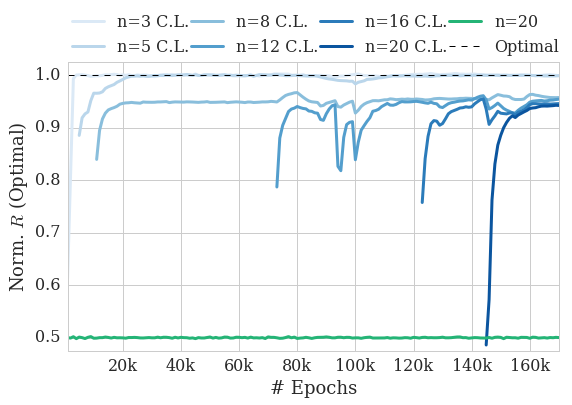

In [11]:
plt.close('all')

fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

plt.plot(x_axis[0], h_3_20[0], color=sns_colors2[0], linestyle='-', linewidth=3, label="n=3 C.L.")
plt.plot(x_axis[1], h_3_20[1], color=sns_colors2[1], linestyle='-', linewidth=3, label="n=5 C.L.")
plt.plot(x_axis[2], h_3_20[2], color=sns_colors2[2], linestyle='-', linewidth=3, label="n=8 C.L.")
plt.plot(x_axis[3], h_3_20[3], color=sns_colors2[3], linestyle='-', linewidth=3, label="n=12 C.L.")
plt.plot(x_axis[4], h_3_20[4], color=sns_colors2[4], linestyle='-', linewidth=3, label="n=16 C.L.")
plt.plot(x_axis[5], h_3_20[5], color=sns_colors2[5], linestyle='-', linewidth=3, label="n=20 C.L.")
# plt.fill_between(x_axis, h_10_10.mean(1) - h_10_10.std(1), h_10_10.mean(1) + h_10_10.std(1), facecolor=sns_colors[0], edgecolor="none", alpha=0.1)


plt.plot(x_axis_all, h_20_20, color=sns_colors[1], linestyle='-', linewidth=3, label="n=20")
# plt.fill_between(x_axis, h_10_10_notshared.mean(1) - h_10_10_notshared.std(1), h_10_10_notshared.mean(1) + h_10_10_notshared.std(1), facecolor=sns_colors[1], edgecolor="none", alpha=0.1)


plt.plot(x_axis_all, np.ones(rows), color='black', linestyle='--', linewidth=1, label="Optimal")

plt.ylabel(r'Norm. $R$ (Optimal)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis_all[0], x_axis_all[-1])
plt.ylim(0.475, 1.025)
# plt.legend(borderaxespad=0.2, fontsize=18, bbox_to_anchor=(1.01, 0.8), loc=2)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(-0.01, 1.1, 1.03, .102), fontsize=16, ncol=4, mode="expand")
# plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., -0.23, 1., .102), fontsize=16, ncol=4, mode="expand")
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
# my_legend()
plt.savefig('h_20_curriculum.pdf', bbox_inches='tight', dpi=200)